___

___
# Logistic Regression Project 

In this project we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

## Import Libraries

**Import a few libraries you think you'll need (Or just import them as you go along!)**

In [18]:
import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
%matplotlib inline
plt.rcParams["patch.force_edgecolor"] = True
sns.set_style('whitegrid')

## Get the Data
**Read in the advertising.csv file and set it to a data frame called ad_data.**

In [19]:
ad_data = pd.read_csv("advertising.csv")

**Check the head of ad_data**

In [20]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


** Use info and describe() on ad_data**

In [21]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [22]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Let's use seaborn to explore the data!

Try recreating the plots shown below!

** Create a histogram of the Age**

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1112b4f28>]], dtype=object)

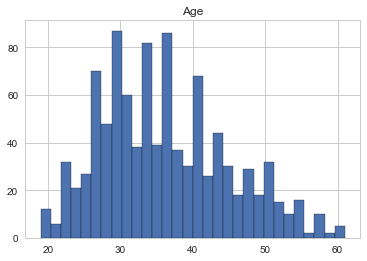

In [24]:
ad_data.hist('Age', bins =30)

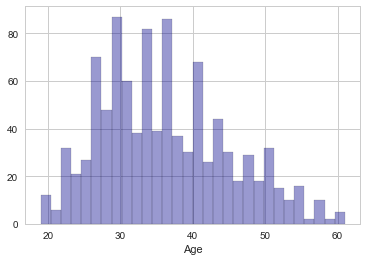

In [30]:
#sns.distplot(train['Age'].dropna(),kde=False,color='darkred',bins=30)
sns.distplot(ad_data['Age'], kde=False, bins=30,color='darkblue')

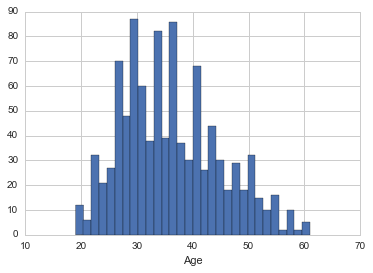

**Create a jointplot showing Area Income versus Age.**

In [32]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


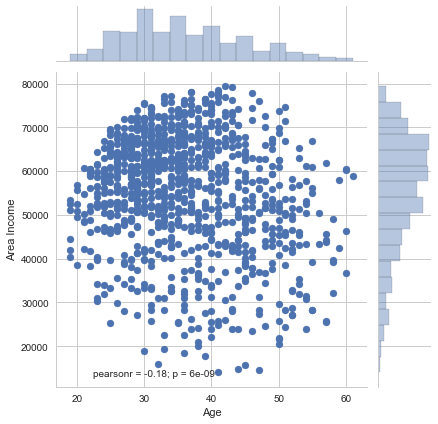

In [33]:
sns.jointplot(x='Age', y='Area Income', data=ad_data)

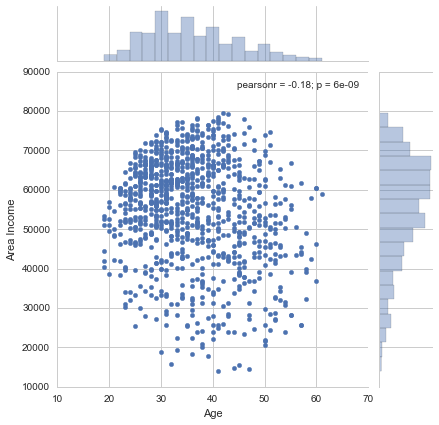

**Create a jointplot showing the kde distributions of Daily Time spent on site vs. Age.**

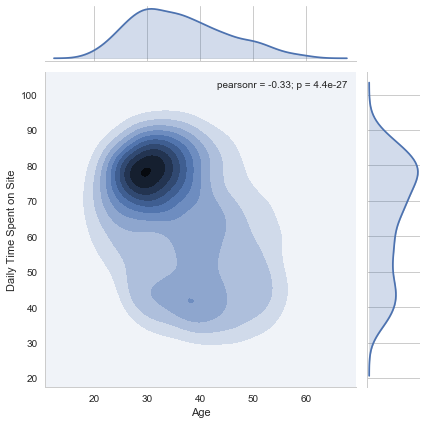

In [35]:
sns.jointplot(x="Age", y="Daily Time Spent on Site", data=ad_data, kind='kde')

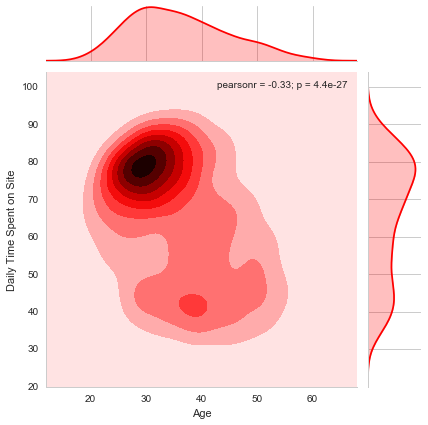

** Create a jointplot of 'Daily Time Spent on Site' vs. 'Daily Internet Usage'**

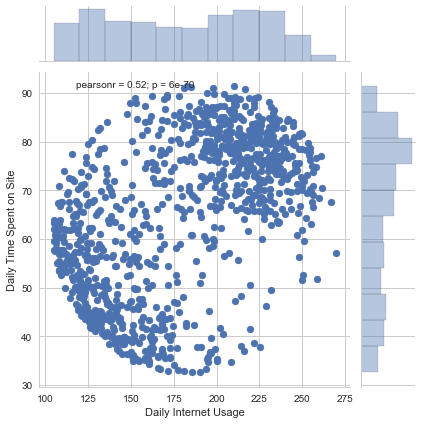

In [36]:
sns.jointplot(x='Daily Internet Usage', y='Daily Time Spent on Site', data=ad_data)

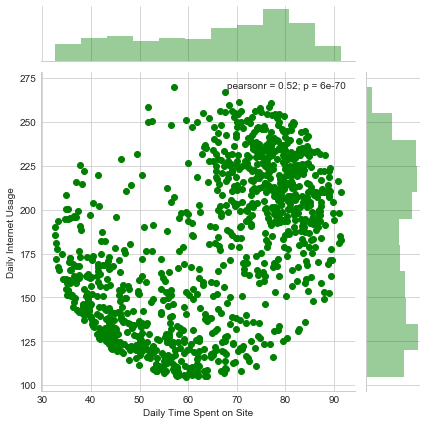

In [9]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='green')

** Finally, create a pairplot with the hue defined by the 'Clicked on Ad' column feature.**

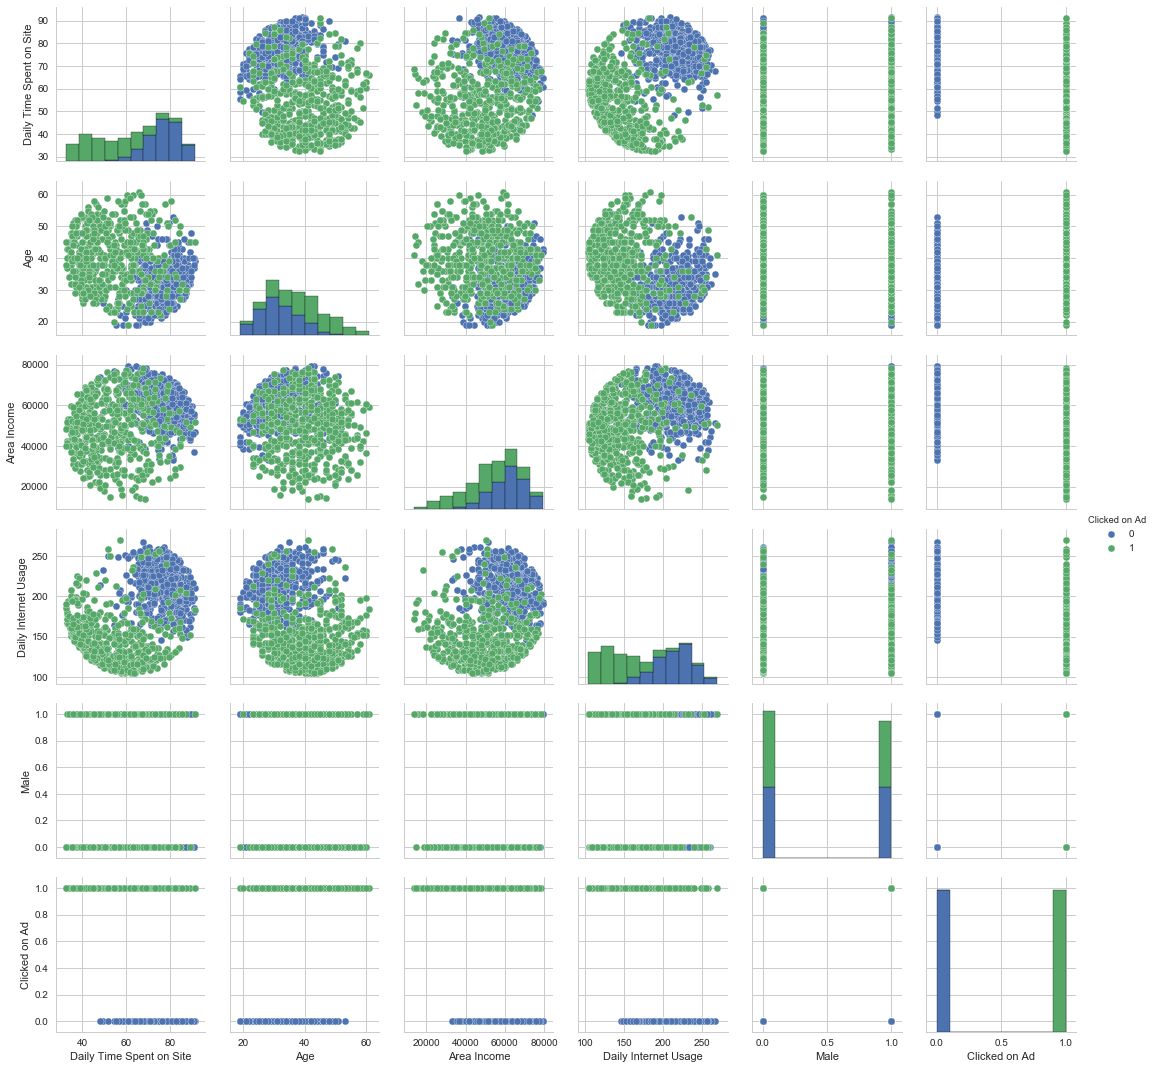

In [37]:
sns.pairplot(hue="Clicked on Ad",data=ad_data)

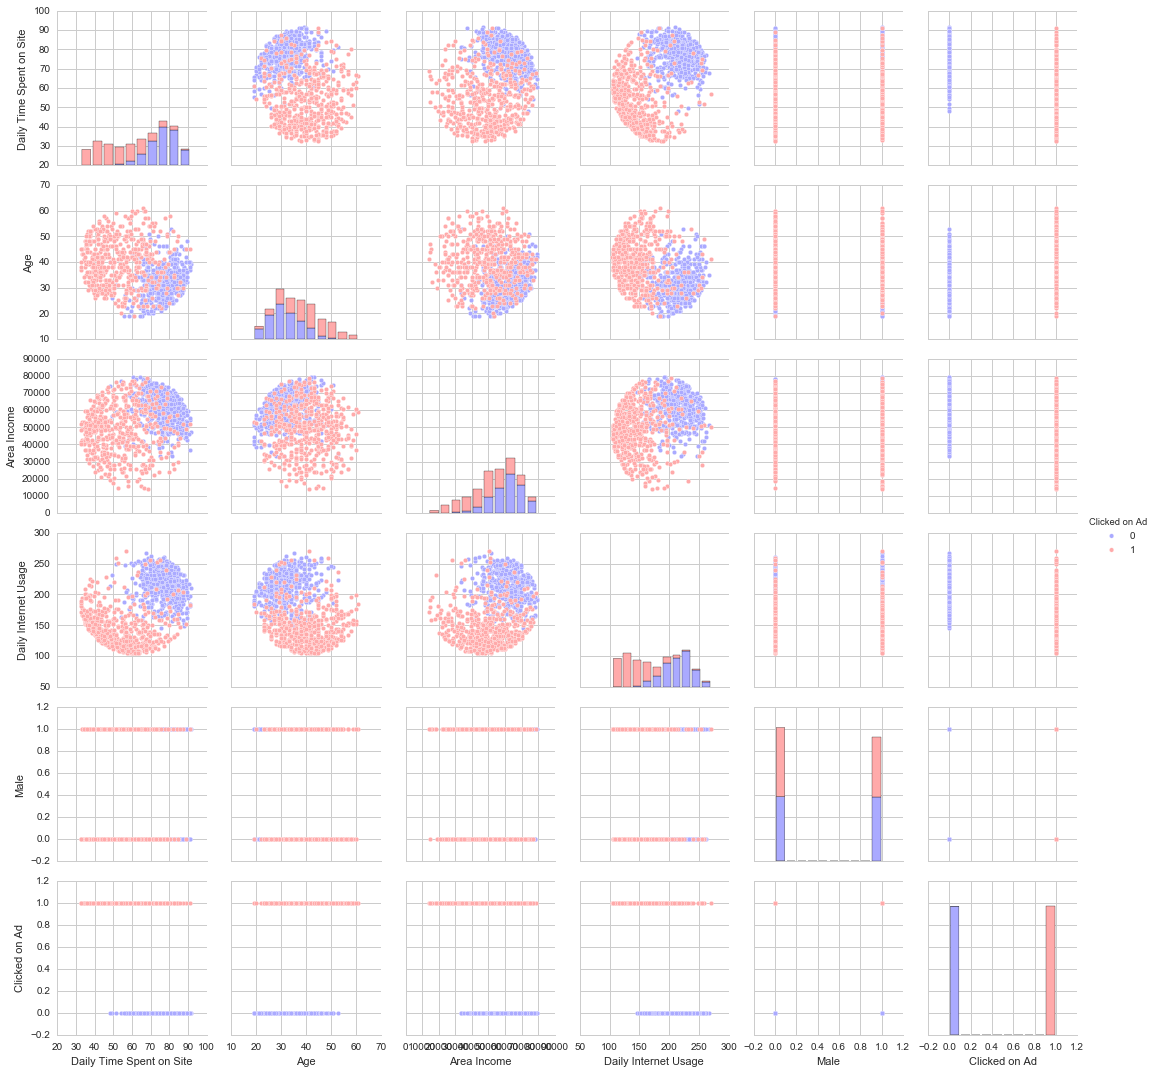

# Logistic Regression

Now it's time to do a train test split, and train our model!

You'll have the freedom here to choose columns that you want to train on!

** Split the data into training set and testing set using train_test_split**

In [39]:
#from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split

In [42]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
Daily Time Spent on Site    1000 non-null float64
Age                         1000 non-null int64
Area Income                 1000 non-null float64
Daily Internet Usage        1000 non-null float64
Ad Topic Line               1000 non-null object
City                        1000 non-null object
Male                        1000 non-null int64
Country                     1000 non-null object
Timestamp                   1000 non-null object
Clicked on Ad               1000 non-null int64
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [44]:
ad_data.columns

Index(['Daily Time Spent on Site', 'Age', 'Area Income',
       'Daily Internet Usage', 'Ad Topic Line', 'City', 'Male', 'Country',
       'Timestamp', 'Clicked on Ad'],
      dtype='object')

In [46]:
#X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
#y = ad_data['Clicked on Ad']
X=ad_data[['Daily Time Spent on Site','Age','Area Income','Daily Internet Usage','Male']]
y = ad_data['Clicked on Ad']

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

** Train and fit a logistic regression model on the training set.**

In [48]:
# from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [49]:

#logmodel = LogisticRegression()
#logmodel.fit(X_train,y_train)

logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predictions and Evaluations
** Now predict values for the testing data.**

In [51]:
pred = logmodel.predict(X_test)

** Create a classification report for the model.**

In [52]:
from sklearn.metrics import classification_report

In [53]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330



# Confusion matrix

In [71]:
# calculate accuracy
from sklearn import metrics

In [55]:
# IMPORTANT: first argument is true values, second argument is predicted values
print(metrics.confusion_matrix(y_test, pred))

[[156   6]
 [ 24 144]]


In [57]:
# save confusion matrix and slice into four pieces
confusion = metrics.confusion_matrix(y_test, pred)
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

**Basic terminology**

- **True Positives (TP):** we *correctly* predicted that it's positive
- **True Negatives (TN):** we *correctly* predicted that it's negative
- **False Positives (FP):** we *incorrectly* predicted that it's positive (a "Type I error")
- **False Negatives (FN):** we *incorrectly* predicted that it's negative (a "Type II error")

## Metrics computed from a confusion matrix

**Classification Accuracy:** Overall, how often is the classifier correct?

In [63]:
print((TP + TN) / float(TP + TN + FP + FN))
print(metrics.accuracy_score(y_test, pred))

0.909090909091
0.909090909091


**Classification Error:** Overall, how often is the classifier incorrect?

- Also known as "Misclassification Rate"

In [64]:
print((FP + FN) / float(TP + TN + FP + FN))
print(1 - metrics.accuracy_score(y_test, pred))

0.0909090909091
0.0909090909091


**Sensitivity:** When the actual value is positive, how often is the prediction correct?

- How "sensitive" is the classifier to detecting positive instances?
- Also known as "True Positive Rate" or "Recall"

In [65]:
print(TP / float(TP + FN))
print(metrics.recall_score(y_test, pred))

0.857142857143
0.857142857143


**Specificity:** When the actual value is negative, how often is the prediction correct?

- How "specific" (or "selective") is the classifier in predicting positive instances?

In [66]:
print(TN / float(TN + FP))

0.962962962963


**False Positive Rate:** When the actual value is negative, how often is the prediction incorrect?

In [67]:
print(FP / float(TN + FP))

0.037037037037


**Precision:** When a positive value is predicted, how often is the prediction correct?

- How "precise" is the classifier when predicting positive instances?

In [69]:
print(TP / float(TP + FP))
print(metrics.precision_score(y_test, pred))

0.96
0.96


In [70]:
print(classification_report(y_test,pred))

             precision    recall  f1-score   support

          0       0.87      0.96      0.91       162
          1       0.96      0.86      0.91       168

avg / total       0.91      0.91      0.91       330

